### Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

tfk = tf.keras
tfkl = tf.keras.layers
tf.config.set_visible_devices([], 'GPU') #disables GPU
print(tf.__version__)

2.12.0


### Set seed for reproducibility

In [2]:
# Random seed for reproducibility
seed = 0

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

### Load data 

In [3]:
data = pd.read_csv('filled.csv')
data = data.set_index('date')
data.sort_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4584 entries, 2019-01-01 00:00:00 to 2019-12-10 23:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BC      4584 non-null   float64
 1   N_CPC   4584 non-null   float64
 2   PM-10   4584 non-null   float64
 3   PM-2.5  4584 non-null   float64
 4   PM-1.0  4584 non-null   float64
 5   NO2     4584 non-null   float64
 6   O3      4584 non-null   float64
 7   SO2     4584 non-null   float64
 8   CO      4584 non-null   float64
 9   NO      4584 non-null   float64
 10  NOX     4584 non-null   float64
 11  TEMP    4584 non-null   float64
 12  HUM     4584 non-null   float64
dtypes: float64(13)
memory usage: 501.4+ KB


In [4]:
data.describe()

,BC,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
count,4584.000000,4584.00000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000
mean,1.309454,13.65188,15.132366,9.302461,7.259924,30.032402,48.139158,1.368459,0.312924,7.796788,41.608059,17.833411,70.848520
std,1.077179,7.90552,13.681307,5.844837,5.259162,20.904562,25.055354,0.767196,0.203269,17.780870,43.576061,5.875968,14.551874
min,0.110000,1.37600,0.600000,0.500000,0.333000,2.000000,1.000000,0.500000,0.100000,0.500000,1.000000,4.083000,19.383000
25%,0.682000,8.00300,8.991750,5.317000,3.383000,15.000000,32.000000,1.000000,0.200000,1.000000,18.000000,13.050000,61.567000
50%,1.037000,12.28950,13.625000,8.433000,6.383000,25.000000,48.139158,1.000000,0.200000,3.000000,30.000000,17.833411,70.848520
75%,1.437250,16.95800,17.817000,11.533000,9.167000,38.000000,63.000000,1.368459,0.312924,7.796788,45.000000,22.333000,82.158250
max,12.767000,73.49000,398.717000,76.833000,34.383000,132.000000,142.000000,13.000000,1.900000,255.000000,521.000000,34.983000,100.000000


In [5]:
target = pd.DataFrame(data.BC)
data = data.drop(['BC'], axis=1)

Split in train and test

In [6]:
X_train_val, X_test, y_train_val, y_test = train_test_split(data, target, test_size = 0.1, random_state=seed, shuffle=True) #can be used with shuf. false
print(X_train_val.shape, y_train_val.shape)
print(X_test.shape, y_test.shape)

(4125, 12) (4125, 1)
(459, 12) (459, 1)


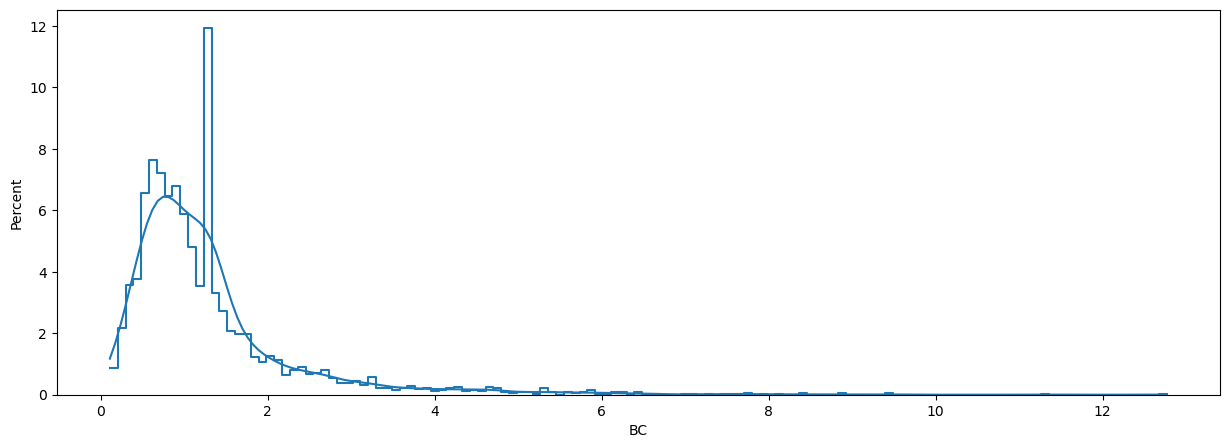

Counting occurrences of target classes:
1.309454    323
0.658000      9
0.958000      7
0.577000      7
0.561000      7
           ... 
0.775000      1
3.961000      1
0.925000      1
5.161000      1
0.398000      1
Name: BC, Length: 1895, dtype: int64


In [7]:
# Inspect the target
plt.figure(figsize=(15,5))
sns.histplot(data=y_train_val, x='BC', stat="percent", element="step", fill=False, kde=True)
plt.show()

print('Counting occurrences of target classes:')
print(pd.DataFrame(y_train_val, columns=['BC'])['BC'].value_counts())

### Process data

In [8]:
# Normalize both features and target
max_df = X_train_val.max()
min_df = X_train_val.min()
max_t = y_train_val.max()
min_t = y_train_val.min()

X_train_val = (X_train_val - min_df)/(max_df - min_df)
y_train_val = (y_train_val - min_t)/(max_t - min_t)

print('data dataset shape',X_train_val.shape)
print('Target shape', y_train_val.shape)
X_train_val.describe()

data dataset shape (4125, 12)
Target shape (4125, 1)


,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
count,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000
mean,0.169610,0.036450,0.114697,0.201850,0.215068,0.335361,0.069363,0.117933,0.029088,0.078239,0.441124,0.638391
std,0.109258,0.034878,0.075353,0.151314,0.160300,0.178272,0.061441,0.113796,0.071900,0.085118,0.190789,0.179613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091147,0.021099,0.062882,0.089574,0.100000,0.223404,0.040000,0.055556,0.001965,0.032692,0.285728,0.523674
50%,0.150012,0.032696,0.103926,0.176211,0.176923,0.334320,0.040000,0.055556,0.009823,0.055769,0.441072,0.638395
75%,0.216213,0.043161,0.144105,0.257974,0.269231,0.439716,0.069477,0.118291,0.028671,0.084615,0.587720,0.778173
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


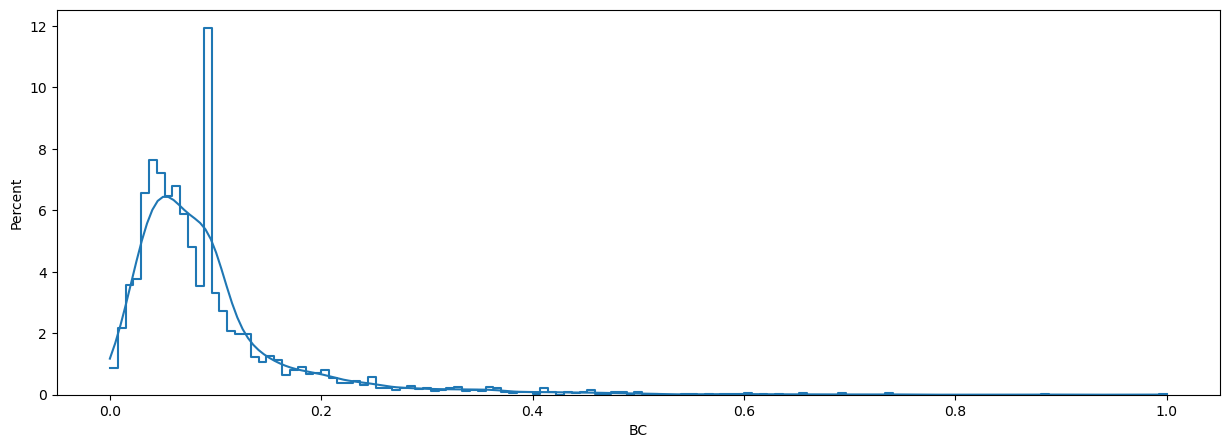

In [9]:
# Inspect the target after normalization
plt.figure(figsize=(15,5))
sns.histplot(data=y_train_val, x='BC', stat="percent", element="step", fill=False, kde=True)
plt.show()

In [10]:
# Normalize the test set with the same parameters of training set
X_test = (X_test - min_df)/(max_df - min_df)
y_test = (y_test - min_t)/(max_t - min_t)

## Hold Out

In [11]:
input_shape = X_train_val.shape[1:]
batch_size = 256
epochs = 1000

In [54]:
def monitor(histories, names, colors, early_stopping=1):
    assert len(histories) == len(names)
    assert len(histories) == len(colors)
    plt.figure(figsize=(15,6))
    for idx in range(len(histories)):
        plt.plot(histories[idx]['mse'][:-early_stopping], label=names[idx]+' Training', alpha=.4, color=colors[idx], linestyle='--')
        plt.plot(histories[idx]['val_mse'][:-early_stopping], label=names[idx]+' Validation', alpha=.8, color=colors[idx])   
    plt.ylim(0.00, 0.02)
    plt.xlim(0, 200)
    plt.title('Mean Squared Error')
    plt.legend(bbox_to_anchor=(1,1))
    plt.grid(alpha=.3)
    plt.show()

In [13]:
def plot_residuals(model, X_, y_):
    X_['sort'] = y_
    X_ = X_.sort_values(by=['sort'])
    y_ = np.expand_dims(X_['sort'], 1)
    X_.drop(['sort'], axis=1, inplace=True)

    y_pred = model.predict(X_)
    SSE = np.square(y_pred - y_)
    MSE = np.mean(SSE)

    print('Mean Squared Error (MSE):', MSE)
    # mpl.rcParams.update(mpl.rcParamsDefault)
    # sns.set(font_scale=1.1, style=None, palette='Set1')
    plt.figure(figsize=(15,5))
    plt.scatter(np.arange(len(y_)), y_, label='True')
    plt.scatter(np.arange(len(y_pred)), y_pred, label='Prediction')
    
    for i in range(len(y_)):
        if(y_[i]>=y_pred[i]):
            plt.vlines(i,y_pred[i],y_[i],alpha=.5)
        else:
            plt.vlines(i,y_[i],y_pred[i],alpha=.5)
            
    plt.legend()
    plt.grid(alpha=.3)
    plt.show()

In [14]:
histories = []
names = []
colors = []
val_scores = []
test_scores = []

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = len(X_test), random_state=seed, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(3666, 12) (3666, 1)
(459, 12) (459, 1)


### Default model

In [16]:
def build_default_model(input_shape):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer1 = tfkl.Dense(units=256, activation='relu', kernel_initializer=tfk.initializers.HeUniform(seed=seed), name='Hidden1')(input_layer)
    hidden_layer2 = tfkl.Dense(units=128, activation='relu', kernel_initializer=tfk.initializers.HeUniform(seed=seed), name='Hidden2')(hidden_layer1)
    hidden_layer3 = tfkl.Dense(units=64, activation='relu', kernel_initializer=tfk.initializers.HeUniform(seed=seed), name='Hidden3')(hidden_layer2)
    output_layer = tfkl.Dense(units=1, activation='linear', kernel_initializer=tfk.initializers.GlorotUniform(seed=seed),name='Output')(hidden_layer3)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='default_model')

    # Compile the model
    learning_rate = 1e-3
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the model
    return model

In [17]:
default_model = build_default_model(input_shape)
default_model.summary()

Model: "default_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 12)]              0         
                                                                 
 Hidden1 (Dense)             (None, 256)               3328      
                                                                 
 Hidden2 (Dense)             (None, 128)               32896     
                                                                 
 Hidden3 (Dense)             (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 44,545
Trainable params: 44,545
Non-trainable params: 0
_________________________________________________________________


In [18]:
default_history = default_model.fit(
    x = X_train,
    y = y_train, 
    validation_data=(X_val, y_val),
    batch_size = batch_size,
    epochs = epochs
).history

Epoch 1/1000


2023-05-15 18:29:24.572827: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


15/15 [==============================] - 0s 7ms/step - loss: 0.0570 - mse: 0.0570 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 8/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0022 - mse: 0

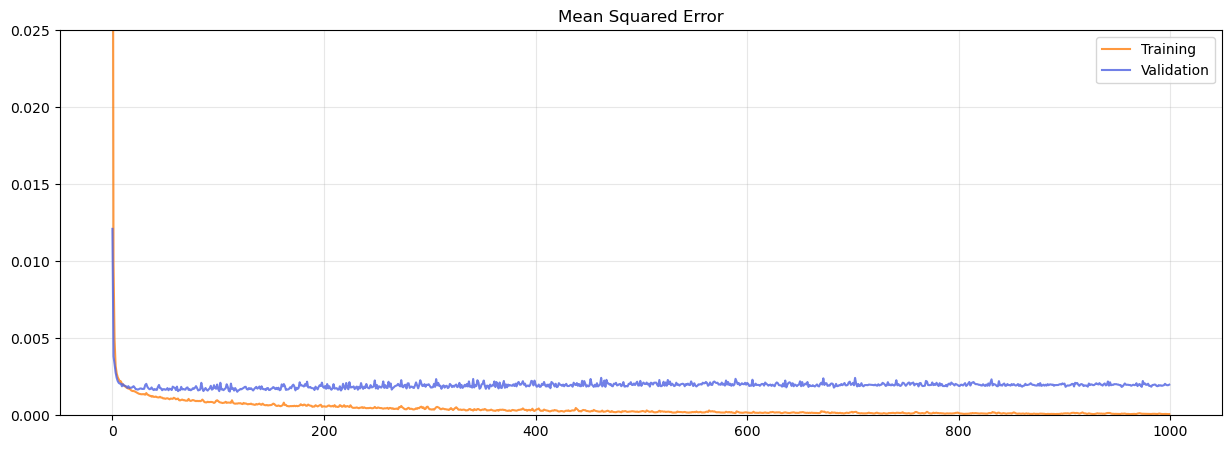

In [19]:
plt.figure(figsize=(15,5))
plt.plot(default_history['mse'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(default_history['val_mse'], label='Validation', alpha=.8, color='#4D61E2')
plt.ylim(0, 0.025)
plt.title('Mean Squared Error')
plt.legend(loc='upper right')
plt.grid(alpha=.3)
plt.show()

Train Performance
115/115 [==============================] - 0s 362us/step
Mean Squared Error (MSE): 6.520691864380446e-05


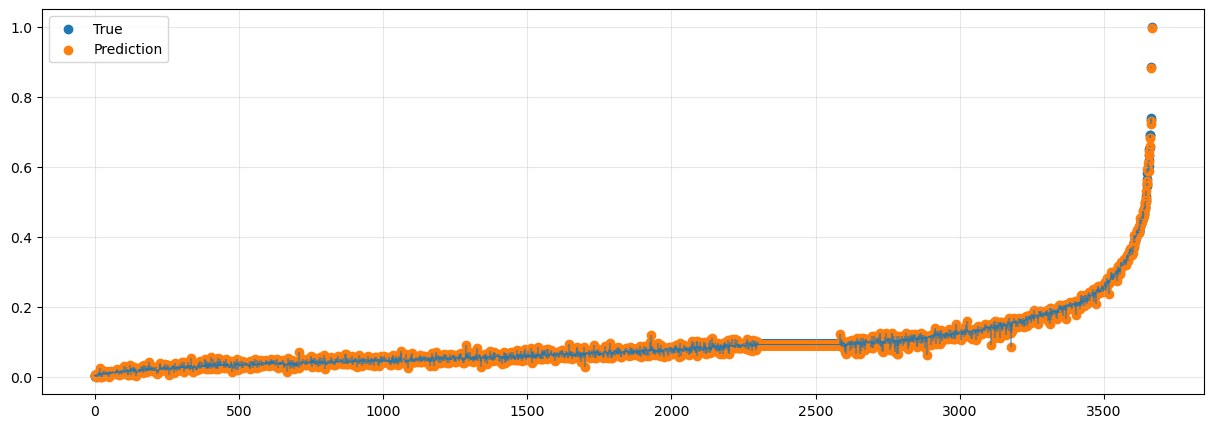

Validation Performance
15/15 [==============================] - 0s 468us/step
Mean Squared Error (MSE): 0.0019889219539398874


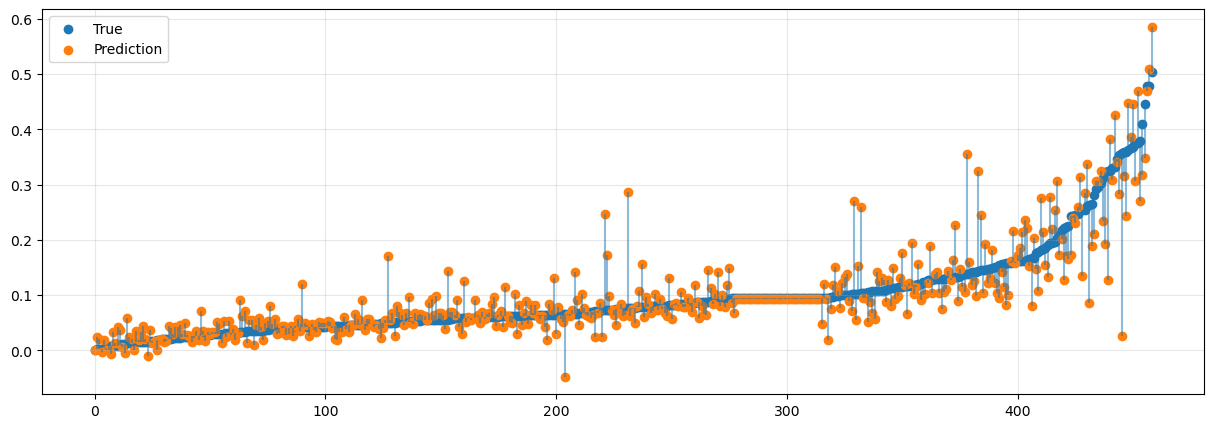

In [20]:
print('Train Performance')
plot_residuals(default_model, X_train.copy(), y_train.copy())
print('Validation Performance')
plot_residuals(default_model, X_val.copy(), y_val.copy())

#### Early Stopping

In [21]:
patience = 150
early_stopping = tfk.callbacks.EarlyStopping(monitor='val_mse', mode='min', patience=patience, restore_best_weights=True)

In [22]:
earlystopping_model = build_default_model(input_shape)
earlystopping_model.summary()
tfk.utils.plot_model(earlystopping_model)

Model: "default_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 12)]              0         
                                                                 
 Hidden1 (Dense)             (None, 256)               3328      
                                                                 
 Hidden2 (Dense)             (None, 128)               32896     
                                                                 
 Hidden3 (Dense)             (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 44,545
Trainable params: 44,545
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and 

In [23]:
earlystopping_history = earlystopping_model.fit(
    x = X_train,
    y = y_train, 
    validation_data=(X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks=[early_stopping]
).history

Epoch 1/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0570 - mse: 0.0570 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 8/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.

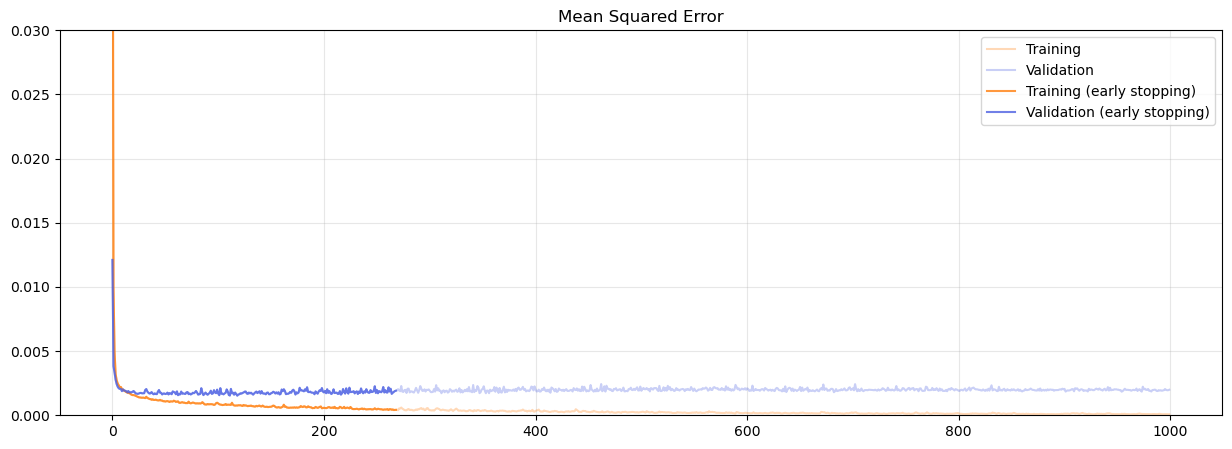

In [24]:
plt.figure(figsize=(15,5))
plt.plot(default_history['mse'], label='Training', alpha=.3, color='#ff7f0e')
plt.plot(default_history['val_mse'], label='Validation', alpha=.3, color='#4D61E2')
plt.plot(earlystopping_history['mse'], label='Training (early stopping)', alpha=.8, color='#ff7f0e')
plt.plot(earlystopping_history['val_mse'], label='Validation (early stopping)', alpha=.8, color='#4D61E2')
plt.ylim(0, 0.03)
plt.title('Mean Squared Error')
plt.legend(loc='upper right')
plt.grid(alpha=.3)
plt.show()

Train Performance
115/115 [==============================] - 0s 388us/step
Mean Squared Error (MSE): 0.0007568711405502782


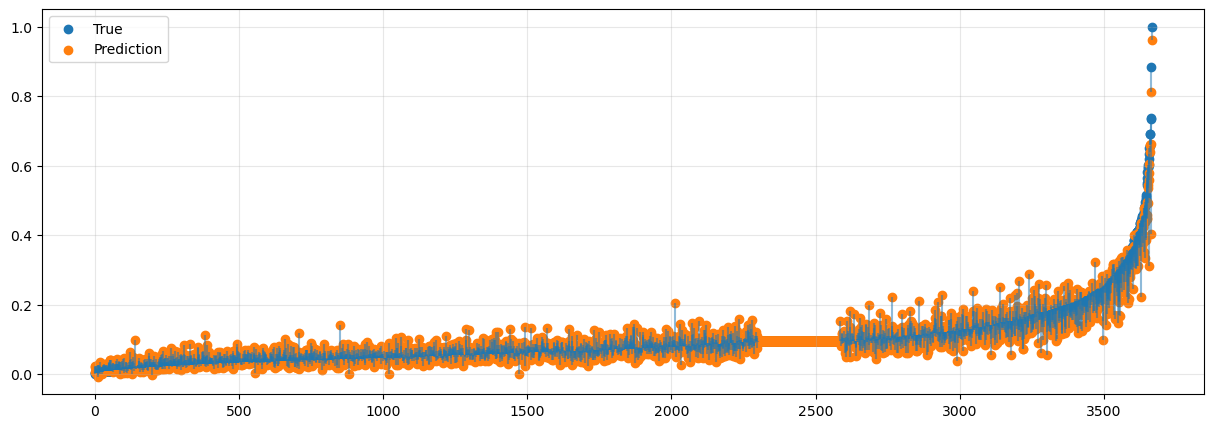

Validation Performance
15/15 [==============================] - 0s 401us/step
Mean Squared Error (MSE): 0.0015270989378014896


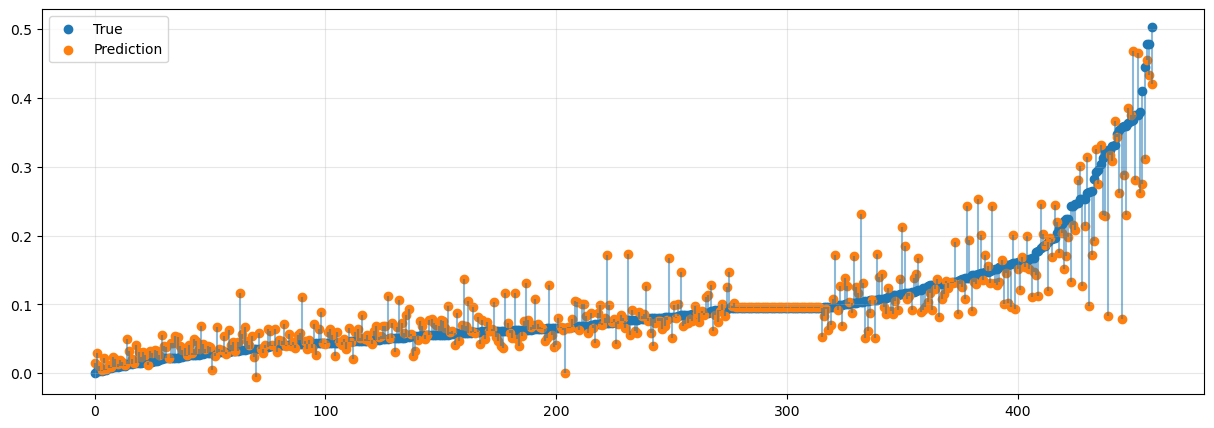

In [25]:
print('Train Performance')
plot_residuals(earlystopping_model, X_train.copy(), y_train.copy())
print('Validation Performance')
plot_residuals(earlystopping_model, X_val.copy(), y_val.copy())

Validation MSE 0.0015


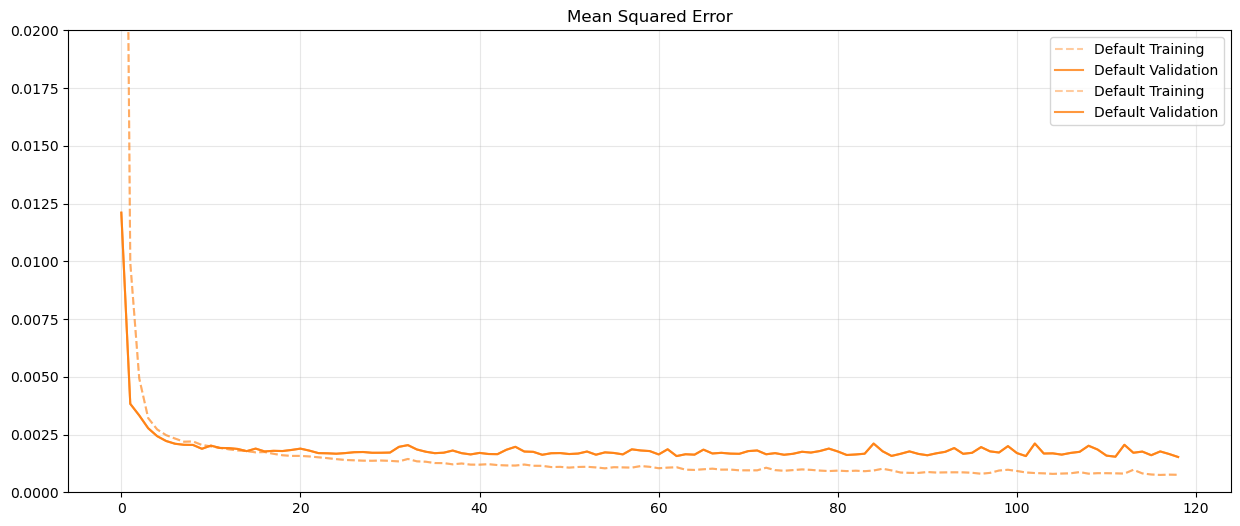

In [28]:
# Store results
val_scores.append(mean_squared_error(y_val, earlystopping_model.predict(X_val, verbose=0)))
print('Validation MSE %.4f' % val_scores[0])
test_scores.append(mean_squared_error(y_test, earlystopping_model.predict(X_test, verbose=0)))
histories.append(earlystopping_history)
names.append('Default')
colors.append('#ff7f0e')
monitor(histories, names, colors, patience)

Save, delete and load a Keras model

In [29]:
earlystopping_model.save('DefaultModel')

INFO:tensorflow:Assets written to: DefaultModel/assets


INFO:tensorflow:Assets written to: DefaultModel/assets


In [30]:
del earlystopping_model

In [31]:
earlystopping_model = tfk.models.load_model('DefaultModel')
print('Validation MSE: %.4f' % mean_squared_error(y_val, earlystopping_model.predict(X_val, verbose=0)))

Validation MSE: 0.0015


## Regularization techniques

### Lasso regression (or l1-norm)

$$\mathrm{Lasso} (y, \hat{y}) = \frac{1}{N} \sum^N_{n=0} (y_n - g(x_n|w))^2 + \lambda\sum^K_{k=0}w_k = \mathrm{MSE} (y, \hat{y}) + \lambda||w||_1
$$

In [32]:
def build_l1_model(input_shape, l1_lambda):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer1 = tfkl.Dense(units=256, activation='relu', name='Hidden1', 
                               kernel_initializer=tfk.initializers.HeUniform(seed=seed), 
                               kernel_regularizer=tf.keras.regularizers.l1(l1_lambda))(input_layer)
    hidden_layer2 = tfkl.Dense(units=128, activation='relu', name='Hidden2', 
                               kernel_initializer=tfk.initializers.HeUniform(seed=seed),
                               kernel_regularizer=tf.keras.regularizers.l1(l1_lambda))(hidden_layer1)
    hidden_layer3 = tfkl.Dense(units=64, activation='relu', name='Hidden3', 
                               kernel_initializer=tfk.initializers.HeUniform(seed=seed),
                               kernel_regularizer=tf.keras.regularizers.l1(l1_lambda))(hidden_layer2)
    output_layer = tfkl.Dense(units=1, activation='linear', name='Output', 
                              kernel_initializer=tfk.initializers.GlorotUniform(seed=seed),
                              kernel_regularizer=tf.keras.regularizers.l1(l1_lambda))(hidden_layer3)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='l1_model')

    # Compile the model
    learning_rate = 1e-3
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the model
    return model

In [33]:
l1_lambda = 2e-5

l1_model = build_l1_model(input_shape, l1_lambda)
l1_model.summary()
tfk.utils.plot_model(l1_model)

Model: "l1_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 12)]              0         
                                                                 
 Hidden1 (Dense)             (None, 256)               3328      
                                                                 
 Hidden2 (Dense)             (None, 128)               32896     
                                                                 
 Hidden3 (Dense)             (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 44,545
Trainable params: 44,545
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and insta

In [34]:
history_l1 = l1_model.fit(
    x = X_train,
    y = y_train, 
    validation_data=(X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks=[early_stopping]
).history

Epoch 1/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.1450 - mse: 0.0570 - val_loss: 0.0977 - val_mse: 0.0121
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0936 - mse: 0.0100 - val_loss: 0.0853 - val_mse: 0.0040
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0844 - mse: 0.0050 - val_loss: 0.0807 - val_mse: 0.0035
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0787 - mse: 0.0032 - val_loss: 0.0761 - val_mse: 0.0027
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0745 - mse: 0.0027 - val_loss: 0.0723 - val_mse: 0.0023
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0710 - mse: 0.0024 - val_loss: 0.0690 - val_mse: 0.0021
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0679 - mse: 0.0023 - val_loss: 0.0661 - val_mse: 0.0020
Epoch 8/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.

Validation MSE 0.0015


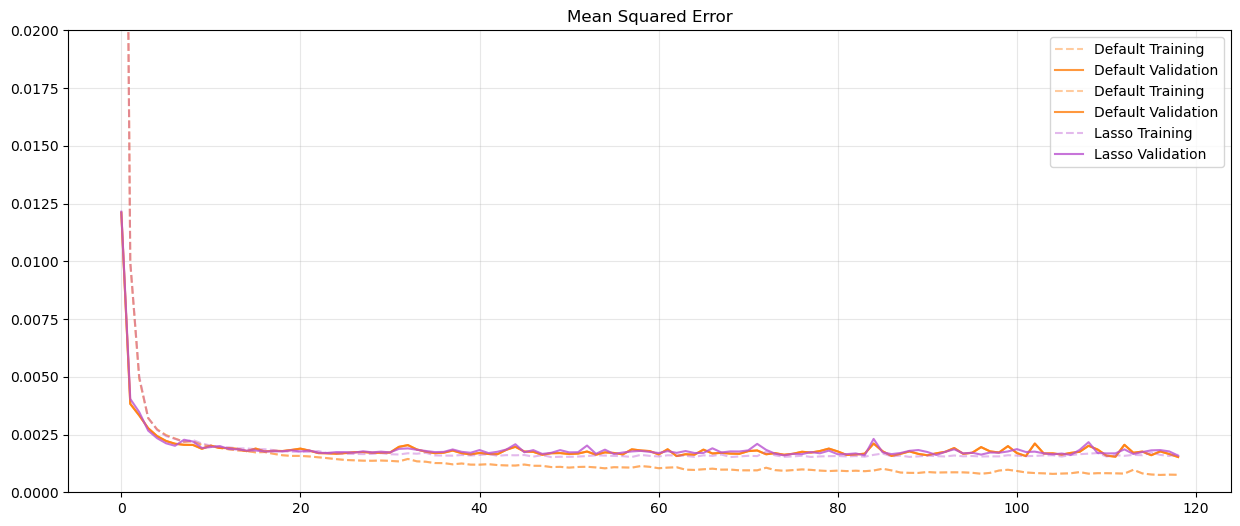

In [35]:
# Store results
val_scores.append(mean_squared_error(y_val, l1_model.predict(X_val, verbose=0)))
print('Validation MSE %.4f' % val_scores[1])
test_scores.append(mean_squared_error(y_test, l1_model.predict(X_test, verbose=0)))
histories.append(history_l1)
names.append('Lasso')
colors.append('#B951D0')
monitor(histories, names, colors, patience)

### Ridge regression (or l2-norm or weight decay)

$$\mathrm{Ridge} (y, \hat{y}) = \frac{1}{N} \sum^N_{n=0} (y_n - g(x_n|w))^2 + \lambda\sum^K_{k=0}w_k^2 = \mathrm{MSE} (y, \hat{y}) + \lambda||w||_2^2
$$

In [36]:
def build_l2_model(input_shape, l2_lambda):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer1 = tfkl.Dense(units=256, activation='relu', name='Hidden1', 
                               kernel_initializer=tfk.initializers.HeUniform(seed=seed), 
                               kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))(input_layer)
    hidden_layer2 = tfkl.Dense(units=128, activation='relu', name='Hidden2', 
                               kernel_initializer=tfk.initializers.HeUniform(seed=seed),
                               kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))(hidden_layer1)
    hidden_layer3 = tfkl.Dense(units=64, activation='relu', name='Hidden3', 
                               kernel_initializer=tfk.initializers.HeUniform(seed=seed),
                               kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))(hidden_layer2)
    output_layer = tfkl.Dense(units=1, activation='linear', name='Output', 
                              kernel_initializer=tfk.initializers.GlorotUniform(seed=seed),
                              kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))(hidden_layer3)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='l2_model')

    # Compile the model
    learning_rate = 1e-3
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the model
    return model

In [37]:
l2_lambda = 2e-5

l2_model = build_l2_model(input_shape, l2_lambda)
l2_model.summary()
tfk.utils.plot_model(l2_model)

Model: "l2_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 12)]              0         
                                                                 
 Hidden1 (Dense)             (None, 256)               3328      
                                                                 
 Hidden2 (Dense)             (None, 128)               32896     
                                                                 
 Hidden3 (Dense)             (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 44,545
Trainable params: 44,545
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and insta

In [38]:
history_l2 = l2_model.fit(
    x = X_train,
    y = y_train, 
    validation_data=(X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks=[early_stopping]
).history

Epoch 1/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.0748 - mse: 0.0570 - val_loss: 0.0296 - val_mse: 0.0121
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0272 - mse: 0.0099 - val_loss: 0.0208 - val_mse: 0.0038
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0217 - mse: 0.0049 - val_loss: 0.0198 - val_mse: 0.0033
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0195 - mse: 0.0032 - val_loss: 0.0188 - val_mse: 0.0028
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0186 - mse: 0.0027 - val_loss: 0.0181 - val_mse: 0.0024
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0180 - mse: 0.0025 - val_loss: 0.0176 - val_mse: 0.0022
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0176 - mse: 0.0024 - val_loss: 0.0171 - val_mse: 0.0021
Epoch 8/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.

Validation MSE 0.0016


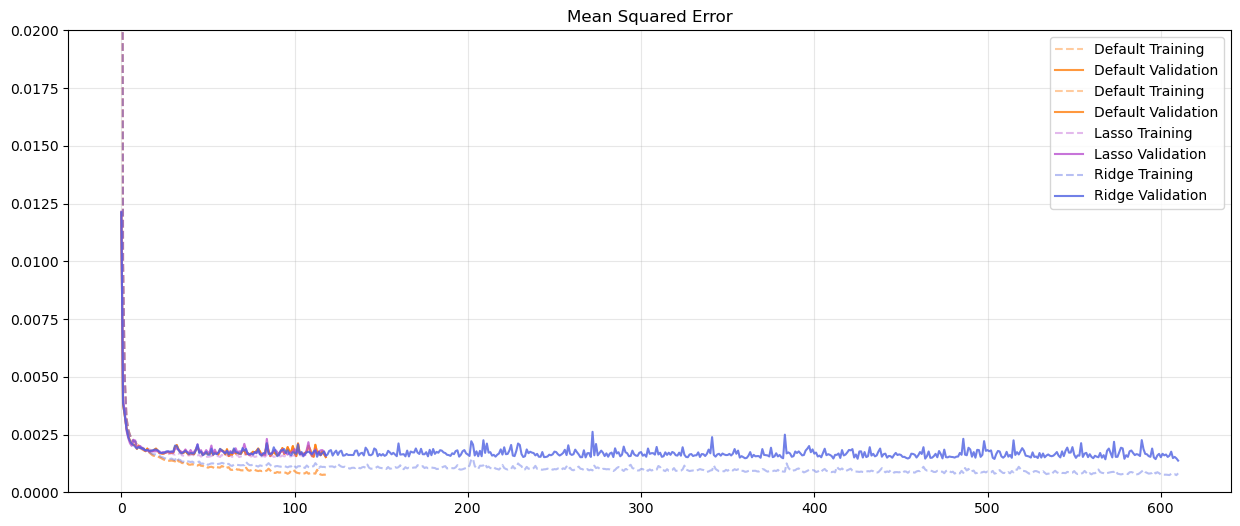

In [39]:
# Store results
val_scores.append(mean_squared_error(y_val, l2_model.predict(X_val, verbose=0)))
print('Validation MSE %.4f' % val_scores[2])
test_scores.append(mean_squared_error(y_test, l2_model.predict(X_test, verbose=0)))
histories.append(history_l2)
names.append('Ridge')
colors.append('#4D61E2')
monitor(histories, names, colors, patience)

### Elastic Net

$$\mathrm{Elastic} (y, \hat{y}) = \frac{1}{N} \sum^N_{n=0} (y_n - g(x_n|w))^2 + \lambda_1\sum^K_{k=0}w_k + \lambda_2\sum^K_{k=0}w_k^2 = \mathrm{MSE} (y, \hat{y}) + \lambda_1||w||_1 + \lambda_2||w||_2^2
$$

In [40]:
def build_elastic_net_model(input_shape, elastic_lambda):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer1 = tfkl.Dense(units=256, activation='relu', name='Hidden1', 
                               kernel_initializer=tfk.initializers.HeUniform(seed=seed), 
                               kernel_regularizer=tf.keras.regularizers.L1L2(elastic_lambda,elastic_lambda))(input_layer)
    hidden_layer2 = tfkl.Dense(units=128, activation='relu', name='Hidden2', 
                               kernel_initializer=tfk.initializers.HeUniform(seed=seed),
                               kernel_regularizer=tf.keras.regularizers.L1L2(elastic_lambda,elastic_lambda))(hidden_layer1)
    hidden_layer3 = tfkl.Dense(units=64, activation='relu', name='Hidden3', 
                               kernel_initializer=tfk.initializers.HeUniform(seed=seed),
                               kernel_regularizer=tf.keras.regularizers.L1L2(elastic_lambda,elastic_lambda))(hidden_layer2)
    output_layer = tfkl.Dense(units=1, activation='linear', name='Output', 
                              kernel_initializer=tfk.initializers.GlorotUniform(seed=seed),
                              kernel_regularizer=tf.keras.regularizers.L1L2(elastic_lambda,elastic_lambda))(hidden_layer3)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='elastic_net_model')

    # Compile the model
    learning_rate = 1e-3
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the model
    return model

In [41]:
elastic_lambda = 1e-5

elastic_model = build_elastic_net_model(input_shape, elastic_lambda)
elastic_model.summary()
tfk.utils.plot_model(elastic_model)

Model: "elastic_net_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 12)]              0         
                                                                 
 Hidden1 (Dense)             (None, 256)               3328      
                                                                 
 Hidden2 (Dense)             (None, 128)               32896     
                                                                 
 Hidden3 (Dense)             (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 44,545
Trainable params: 44,545
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) 

In [42]:
history_elastic = elastic_model.fit(
    x = X_train,
    y = y_train, 
    validation_data=(X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks=[early_stopping]
).history

Epoch 1/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.1100 - mse: 0.0570 - val_loss: 0.0638 - val_mse: 0.0122
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0606 - mse: 0.0099 - val_loss: 0.0532 - val_mse: 0.0038
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0534 - mse: 0.0049 - val_loss: 0.0506 - val_mse: 0.0033
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0496 - mse: 0.0032 - val_loss: 0.0481 - val_mse: 0.0027
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0027 - val_loss: 0.0460 - val_mse: 0.0024
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0453 - mse: 0.0025 - val_loss: 0.0442 - val_mse: 0.0022
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0437 - mse: 0.0024 - val_loss: 0.0427 - val_mse: 0.0021
Epoch 8/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.

Validation MSE 0.0014


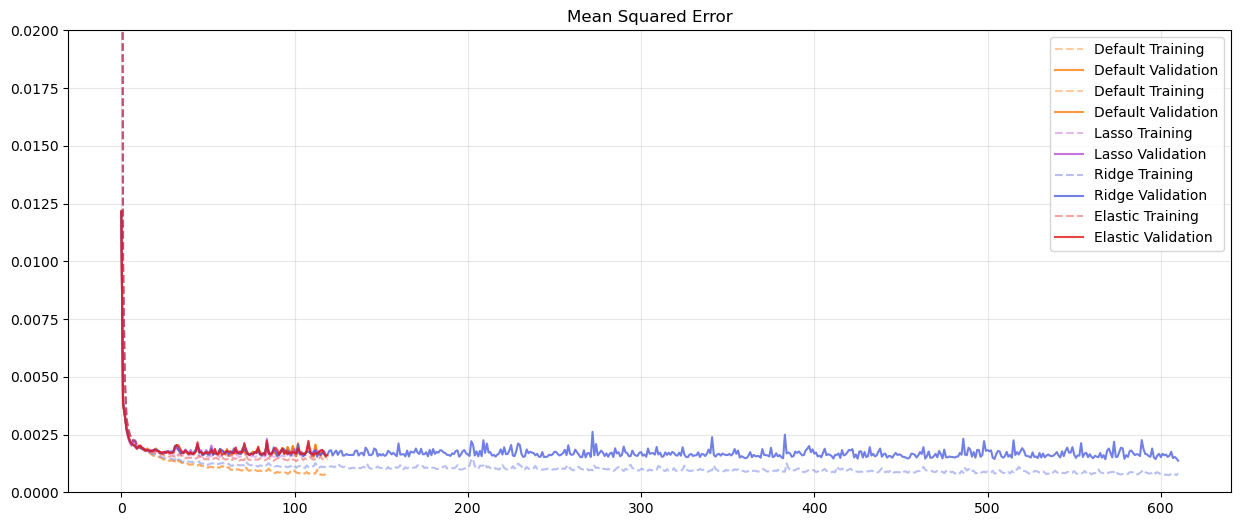

In [43]:
# Store results
val_scores.append(mean_squared_error(y_val, elastic_model.predict(X_val, verbose=0)))
print('Validation MSE %.4f' % val_scores[3])
test_scores.append(mean_squared_error(y_test, elastic_model.predict(X_test, verbose=0)))
histories.append(history_elastic)
names.append('Elastic')
colors.append('#E61818')
monitor(histories, names, colors, patience)

### Dropout

In [44]:
def build_dropout_model(input_shape, dropout_rate):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer1 = tfkl.Dense(units=256, activation='relu', name='Hidden1', 
                               kernel_initializer=tfk.initializers.HeUniform(seed=seed))(input_layer)
    hidden_layer1 = tfkl.Dropout(dropout_rate, seed=seed)(hidden_layer1)
    hidden_layer2 = tfkl.Dense(units=128, activation='relu', name='Hidden2', 
                               kernel_initializer=tfk.initializers.HeUniform(seed=seed))(hidden_layer1)
    hidden_layer2 = tfkl.Dropout(dropout_rate, seed=seed)(hidden_layer2)
    hidden_layer3 = tfkl.Dense(units=64, activation='relu', name='Hidden3', 
                               kernel_initializer=tfk.initializers.HeUniform(seed=seed))(hidden_layer2)
    hidden_layer3 = tfkl.Dropout(dropout_rate, seed=seed)(hidden_layer3)
    output_layer = tfkl.Dense(units=1, activation='linear', name='Output', 
                              kernel_initializer=tfk.initializers.GlorotUniform(seed=seed))(hidden_layer3)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='dropout_model')

    # Compile the model
    learning_rate = 1e-3
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the model
    return model

In [45]:
dropout_rate = 0.3

dropout_model = build_dropout_model(input_shape, dropout_rate)
dropout_model.summary()
tfk.utils.plot_model(dropout_model)

Model: "dropout_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 12)]              0         
                                                                 
 Hidden1 (Dense)             (None, 256)               3328      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 Hidden2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 Hidden3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)              

In [46]:
history_dropout = dropout_model.fit(
    x = X_train,
    y = y_train, 
    validation_data=(X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks=[early_stopping]
).history

Epoch 1/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.1710 - mse: 0.1710 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0405 - mse: 0.0405 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 8/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.

Validation MSE 0.0016


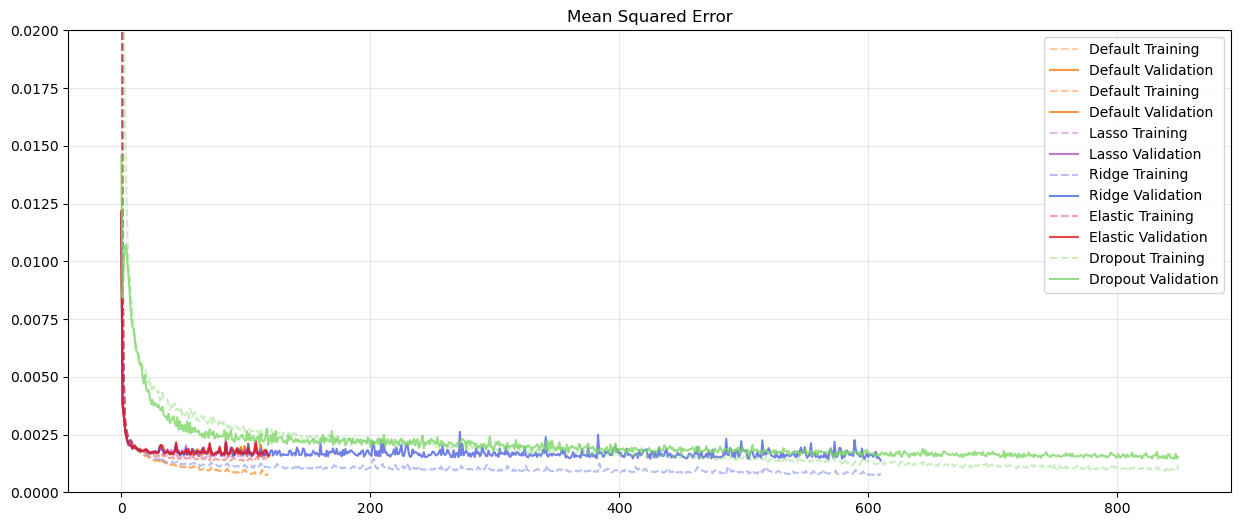

In [47]:
# Store results
val_scores.append(mean_squared_error(y_val, dropout_model.predict(X_val, verbose=0)))
print('Validation MSE %.4f' % val_scores[4])
test_scores.append(mean_squared_error(y_test, dropout_model.predict(X_test, verbose=0)))
histories.append(history_dropout)
names.append('Dropout')
colors.append('#7DD667')
monitor(histories, names, colors, patience)

### Results

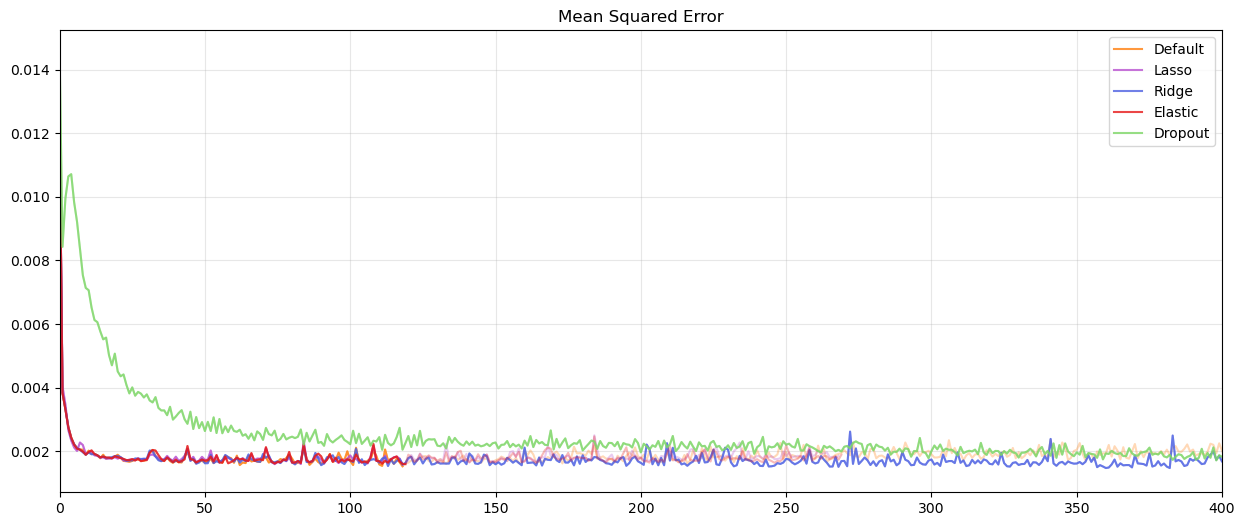

In [61]:
plt.figure(figsize=(15,6))
plt.plot(default_history['val_mse'], alpha=.3, color='#ff7f0e')
plt.plot(earlystopping_history['val_mse'][:-patience], alpha=.8, color='#ff7f0e', label='Default')
plt.plot(history_l1['val_mse'], alpha=.3, color='#B951D0')
plt.plot(history_l1['val_mse'][:-patience], alpha=.8, color='#B951D0', label='Lasso')
plt.plot(history_l2['val_mse'], alpha=.3, color='#4D61E2')
plt.plot(history_l2['val_mse'][:-patience], alpha=.8, color='#4D61E2', label='Ridge')
plt.plot(history_elastic['val_mse'], alpha=.3, color='#E61818')
plt.plot(history_elastic['val_mse'][:-patience], alpha=.8, color='#E61818', label='Elastic')
plt.plot(history_dropout['val_mse'], alpha=.3, color='#7DD667')
plt.plot(history_dropout['val_mse'][:-patience], alpha=.8, color='#7DD667', label='Dropout')
plt.xlim(0, 400)
plt.title('Mean Squared Error')
plt.legend(loc='upper right')
plt.grid(alpha=.3)
plt.show()

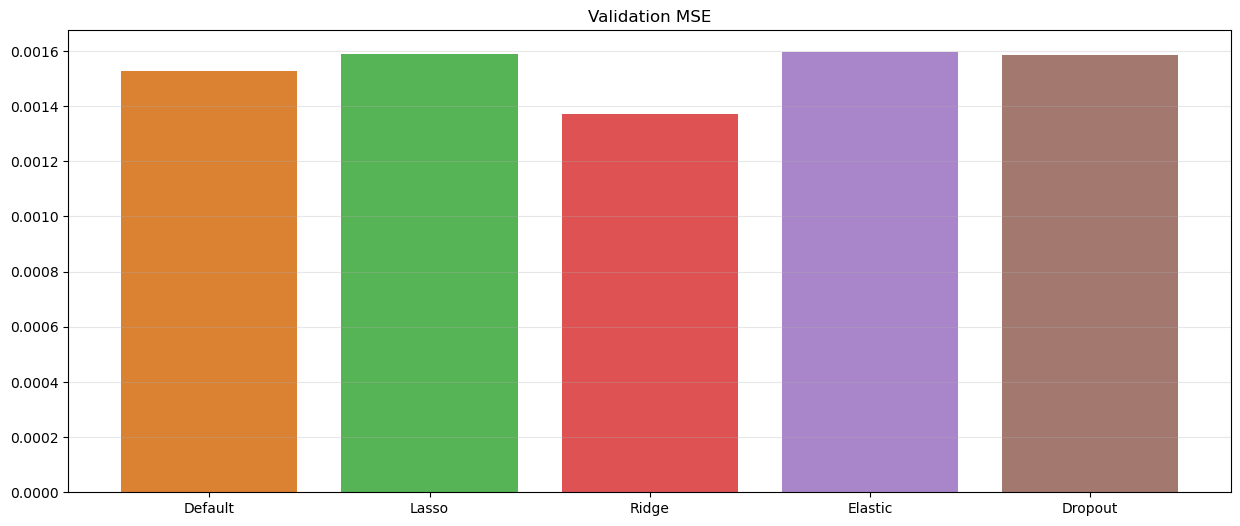

In [58]:
plt.figure(figsize=(15,6))
plt.bar(names, val_scores, color=colors, alpha=.8)
plt.title('Validation MSE')
plt.grid(alpha=.3, axis='y')
plt.show()

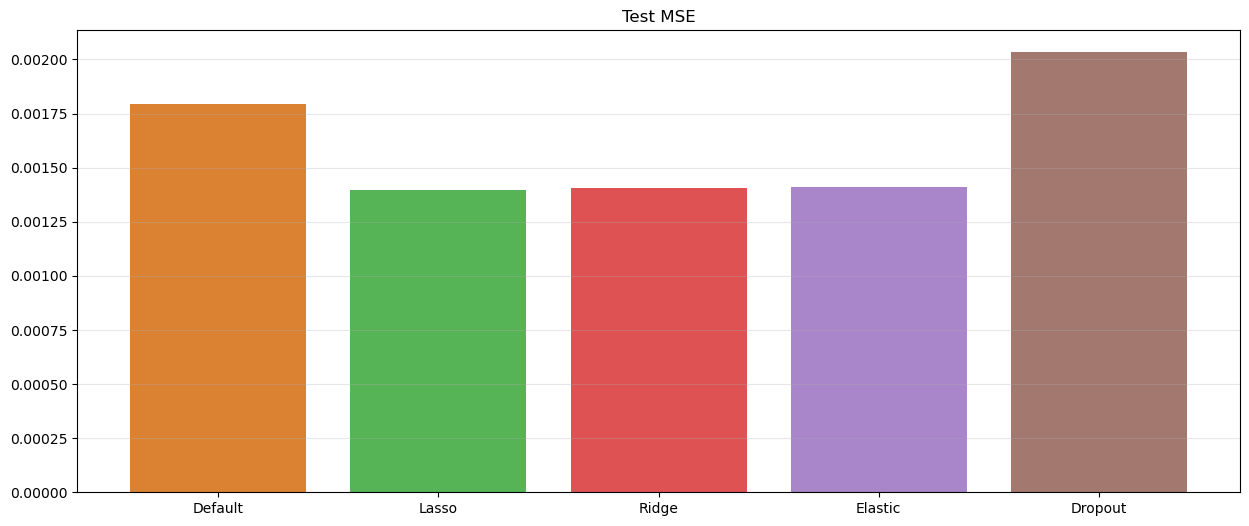

In [59]:
plt.figure(figsize=(15,6))
plt.bar(names, test_scores, color=colors, alpha=.8)
plt.title('Test MSE')
plt.grid(alpha=.3, axis='y')
plt.show()

Train Performance with Best Model
115/115 [==============================] - 0s 395us/step
Mean Squared Error (MSE): 0.0006280909397625901


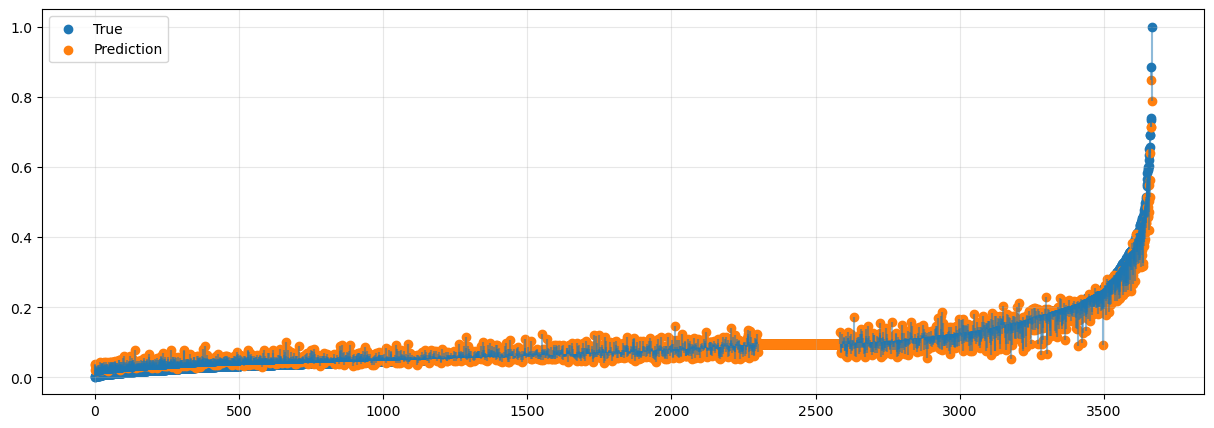

Validation Performance with Best Model
15/15 [==============================] - 0s 390us/step
Mean Squared Error (MSE): 0.0015849717029886295


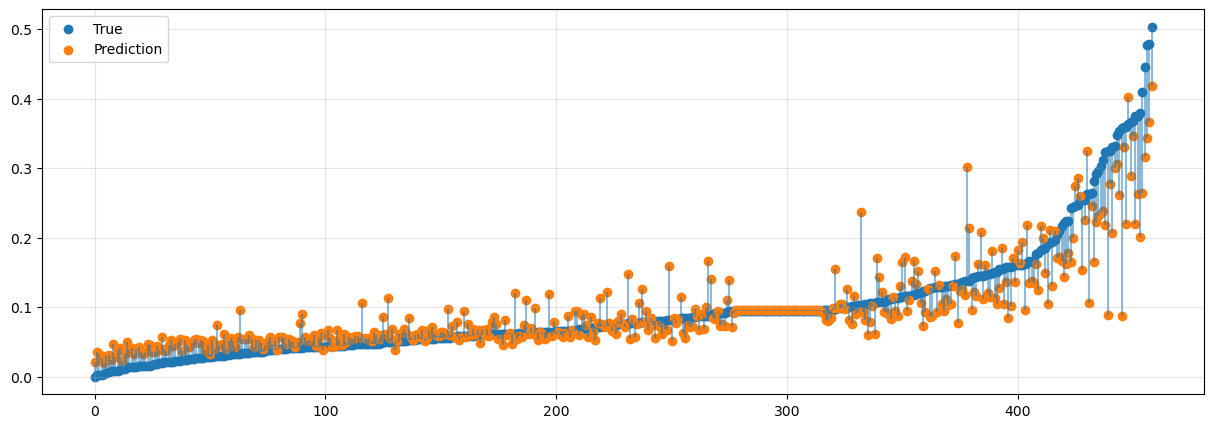

Test Performance with Best Model
15/15 [==============================] - 0s 420us/step
Mean Squared Error (MSE): 0.0020328711452637744


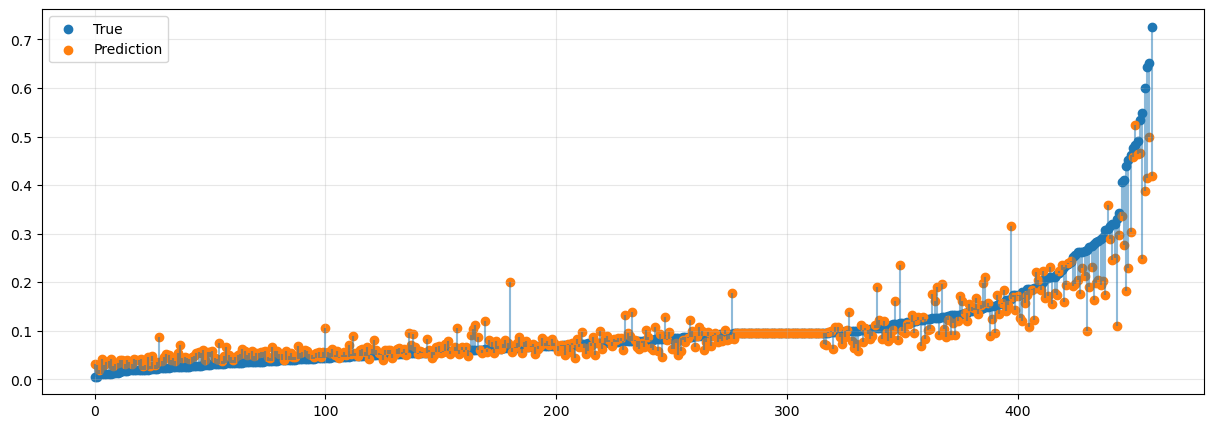

In [51]:
print('Train Performance with Best Model')
plot_residuals(dropout_model, X_train.copy(), y_train.copy())
print('Validation Performance with Best Model')
plot_residuals(dropout_model, X_val.copy(), y_val.copy())
print('Test Performance with Best Model')
plot_residuals(dropout_model, X_test.copy(), y_test.copy())

#K-Fold Cross-Validation

In [52]:
from sklearn.model_selection import KFold

num_folds = 10

histories = []
scores = []

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

for fold_idx, (train_idx, valid_idx) in enumerate(kfold.split(X_train_val, y_train_val)):

  print("Starting training on fold num: {}".format(fold_idx+1))

  model = build_dropout_model(input_shape, dropout_rate)

  history = model.fit(
    x = X_train_val.iloc[train_idx],
    y = y_train_val.iloc[train_idx],
    validation_data=(X_train_val.iloc[valid_idx], y_train_val.iloc[valid_idx]),
    batch_size = batch_size,
    epochs = epochs,
    callbacks=[early_stopping],
    verbose = 0
  ).history

  score = model.evaluate(X_train_val.iloc[valid_idx], y_train_val.iloc[valid_idx])
  scores.append(score[1])

  histories.append(history)

Starting training on fold num: 1
13/13 [==============================] - 0s 538us/step - loss: 0.0015 - mse: 0.0015


Starting training on fold num: 2
13/13 [==============================] - 0s 482us/step - loss: 0.0018 - mse: 0.0018


Starting training on fold num: 3
13/13 [==============================] - 0s 581us/step - loss: 0.0015 - mse: 0.0015


Starting training on fold num: 4
13/13 [==============================] - 0s 463us/step - loss: 0.0021 - mse: 0.0021  


Starting training on fold num: 5
13/13 [==============================] - 0s 556us/step - loss: 0.0014 - mse: 0.0014


Starting training on fold num: 6
13/13 [==============================] - 0s 457us/step - loss: 0.0014 - mse: 0.0014  


Starting training on fold num: 7
13/13 [==============================] - 0s 520us/step - loss: 0.0012 - mse: 0.0012  
Starting training on fold num: 8


13/13 [==============================] - 0s 481us/step - loss: 0.0014 - mse: 0.0014  


Starting training on fold num: 9
13/13 [==============================] - 0s 502us/step - loss: 0.0020 - mse: 0.0020


Starting training on fold num: 10
13/13 [==============================] - 0s 457us/step - loss: 0.0012 - mse: 0.0012


MSE
Mean: 0.0015; STD: 0.0003


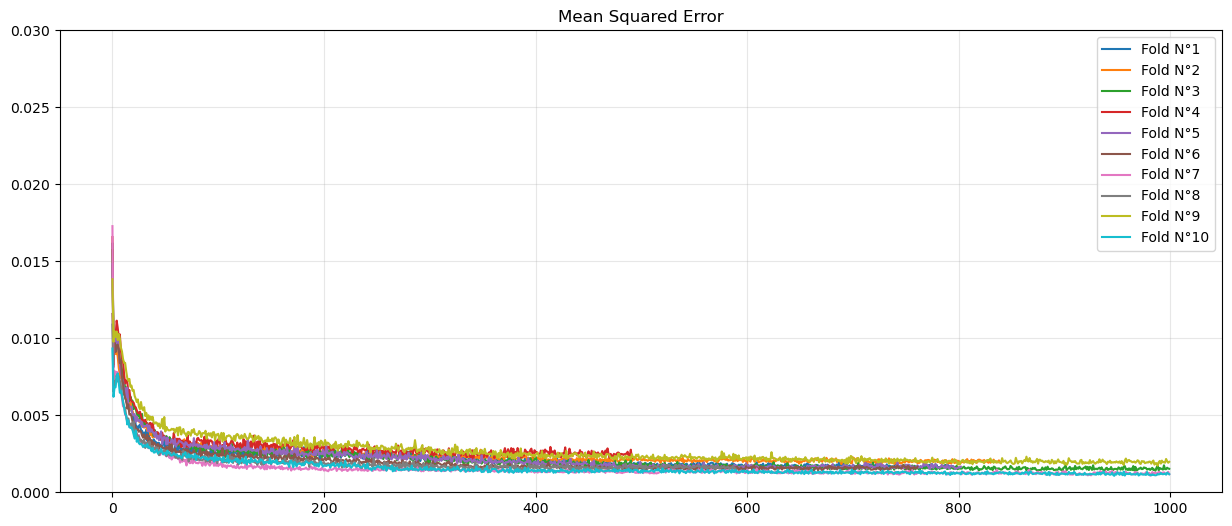

In [55]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

print("MSE")
print("Mean: {}; STD: {}".format(np.mean(scores).round(4), np.std(scores).round(4)))

plt.figure(figsize=(15,6))
for fold_idx in range(num_folds):
  plt.plot(histories[fold_idx]['val_mse'], color=colors[fold_idx], label='Fold N°{}'.format(fold_idx+1))
  plt.ylim(0.00, 0.03)
  plt.title('Mean Squared Error')
  plt.legend(loc='upper right')
  plt.grid(alpha=.3)
plt.show()

In [57]:
scores

[0.0015103778569027781,
 0.0018210449488833547,
 0.0015252947341650724,
 0.002119350479915738,
 0.0014492810005322099,
 0.0013691344065591693,
 0.0011768732219934464,
 0.0013584785629063845,
 0.001977902604267001,
 0.0011728022946044803]

In [56]:
# Predicting Test data with the model
y_test_pred = kfold.predict(X_test)

AttributeError: 'KFold' object has no attribute 'predict'

In [ ]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5900158460478174
Adjusted R^2: 0.5513941503856553
MAE: 3.7561453553021686
MSE: 42.81057499010247
RMSE: 6.542979060802691
